In [39]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [40]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [41]:
cd drive/MyDrive

[Errno 2] No such file or directory: 'drive/MyDrive'
/content/drive/MyDrive


In [69]:
batch_size = 8
img_height = 224
img_width = 224


In [70]:
data_dir = pathlib.Path('Data')

In [95]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  label_mode= "int",
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 1521 files belonging to 6 classes.
Using 1217 files for training.


In [96]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  label_mode='int',
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 1521 files belonging to 6 classes.
Using 304 files for validation.


In [97]:
class_names = train_ds.class_names
print(class_names)


['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']


InvalidArgumentError: ignored

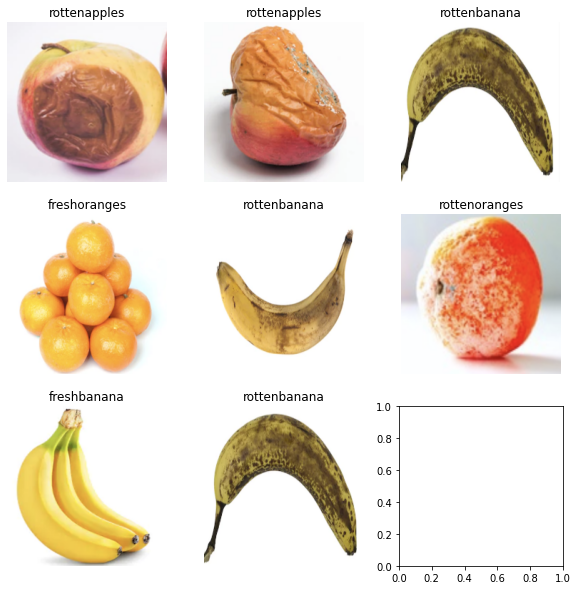

In [98]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [99]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(8, 224, 224, 3)
(8,)


In [100]:
from tensorflow.keras.applications import EfficientNetB5

efficient_net = EfficientNetB5(weights='imagenet', include_top= False)

print(efficient_net.summary())

Model: "efficientnetb5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling_12 (Rescaling)        (None, None, None, 3 0           input_5[0][0]                    
__________________________________________________________________________________________________
normalization_4 (Normalization) (None, None, None, 3 7           rescaling_12[0][0]               
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 3 0           normalization_4[0][0]            
_____________________________________________________________________________________

In [101]:
num_classes = 6

model = Sequential()

model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)))

model.add(efficient_net)

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(num_classes))


In [102]:
print(model.summary())

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_13 (Rescaling)     (None, 224, 224, 3)       0         
_________________________________________________________________
efficientnetb5 (Functional)  (None, None, None, 2048)  28513527  
_________________________________________________________________
flatten_2 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_16 (Dense)             (None, 512)               51380736  
_________________________________________________________________
dense_17 (Dense)             (None, 6)                 3078      
Total params: 79,897,341
Trainable params: 79,724,598
Non-trainable params: 172,743
_________________________________________________________________
None


In [103]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [104]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)


Epoch 1/10
153/153 [==============================] - 486s 3s/step - loss: 4.9015 - accuracy: 0.6553 - val_loss: 7.6769 - val_accuracy: 0.2072
Epoch 2/10
153/153 [==============================] - 58s 375ms/step - loss: 0.7810 - accuracy: 0.8019 - val_loss: 3.0341 - val_accuracy: 0.2928
Epoch 3/10
153/153 [==============================] - 58s 374ms/step - loss: 0.1819 - accuracy: 0.9428 - val_loss: 2.5191 - val_accuracy: 0.3750
Epoch 4/10
153/153 [==============================] - 57s 374ms/step - loss: 0.1334 - accuracy: 0.9603 - val_loss: 1.9177 - val_accuracy: 0.4901
Epoch 5/10
153/153 [==============================] - 57s 374ms/step - loss: 0.3483 - accuracy: 0.9100 - val_loss: 51.6637 - val_accuracy: 0.1711
Epoch 6/10
153/153 [==============================] - 57s 372ms/step - loss: 2.2700 - accuracy: 0.3758 - val_loss: 1.9347 - val_accuracy: 0.2566
Epoch 7/10
153/153 [==============================] - 57s 373ms/step - loss: 1.3214 - accuracy: 0.4810 - val_loss: 1.4120 - val_acc

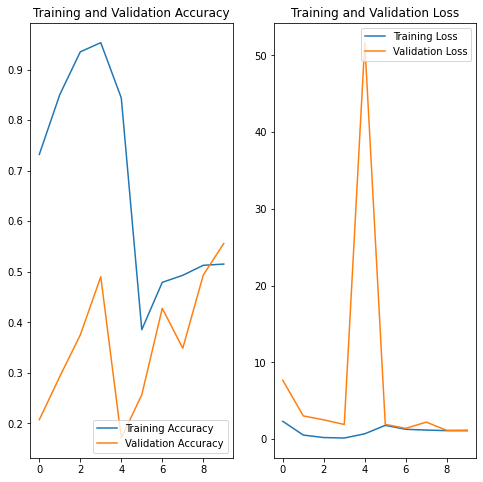

In [105]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
model.save('Data/FruitDisease',save_format='h5')

In [112]:
apple_url = "https://t3.ftcdn.net/jpg/03/59/81/96/360_F_359819630_mv4cB5eBKzj0FQDWCxBAtiY6STPqehfH.jpg"
apple_path = tf.keras.utils.get_file('Red_sunflower', origin=apple_url)

img = keras.preprocessing.image.load_img(
    apple_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)


This image most likely belongs to rottenapples with a 22.00 percent confidence.
